[0.8990824386914269, -0.030792937533311186, -0.5470704321758953, -0.6824392770191371, -1.075674828665272, -1.269804751626002, -0.12712642948961958, 0.3653601730832595, 1.3702387531948466, 0.5749778294788153, 0.6065996301759171, -0.17336855661957581, -0.2303436146931746, -1.6805081944543625, -1.4730487046431766, -0.629710690037348, 0.15862615377819209, 0.7733527035400735, 1.272583744842915, 0.3303415283942345, 0.560029960021074, -0.2661767812738788, -0.48873506872708816, -1.3754135843254143, -0.9511038821425373, -0.8490509253111964, -0.2959013985183773, 0.5159526781820502, 0.9025271444490583, 0.8684749284477877, 0.18301381288760898, -0.6354549617281458, -0.6645612064865972, -1.1421593425694012, -1.4348958770936702, -0.55476272021512, -0.14320272257643138, 0.978725319142804, 0.8147793888324948, 1.0774357468943696, 0.8506660269327768, 0.28213042781950376, -0.49462128042723147, -1.2244367777179572, -1.7007197568103853, -0.5570763049947318, 0.34920230246905637, 0.19161985437585555, 0.922802

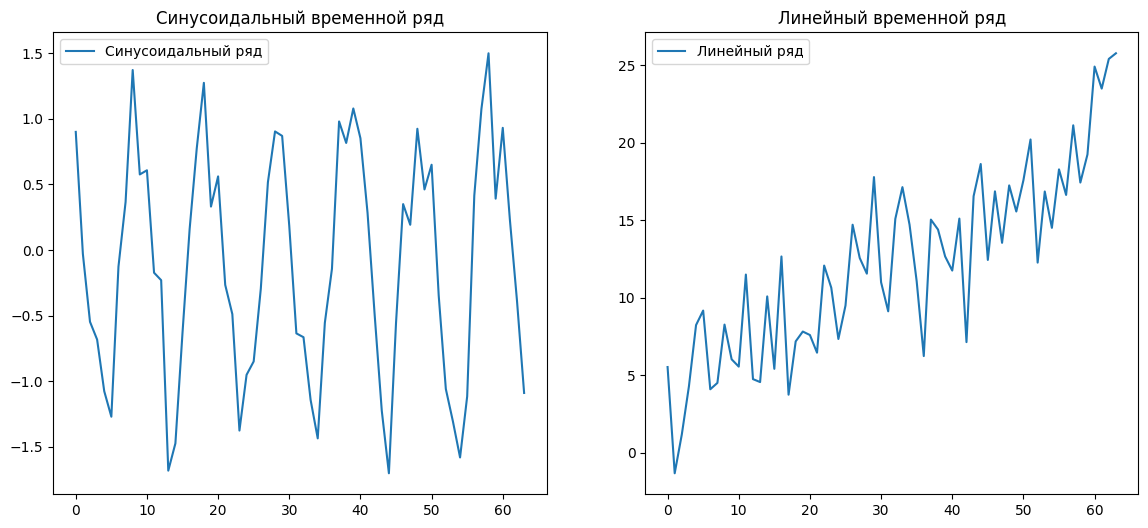

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import linregress

with open('1.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]
print(data1)

with open('2.txt', 'r') as file:
    data2 = file.read().splitlines()
    data2 = [float(line) for line in data2]
print(data2)

df1 = pd.DataFrame(data1, columns=['Value'])
df2 = pd.DataFrame(data2, columns=['Value'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df1['Value'], label='Синусоидальный ряд')
plt.title("Синусоидальный временной ряд")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df2['Value'], label='Линейный ряд')
plt.title("Линейный временной ряд")
plt.legend()
plt.show()


Лучшее окно для SMA (синусоидальный ряд): 7 Q-статистика: 171.63746410897312
Лучшее окно для SMA (линейный ряд): 19 Q-статистика: 12.132283311775293
Дарбин-Уотсон (синусоидальный ряд, SMA): 0.9331755745882498
Интерпретация для синусоидального ряда: Положительная автокорреляция
Дарбин-Уотсон (линейный ряд, SMA): 2.2689507205289874
Интерпретация для линейного ряда: Отсутствие автокорреляции


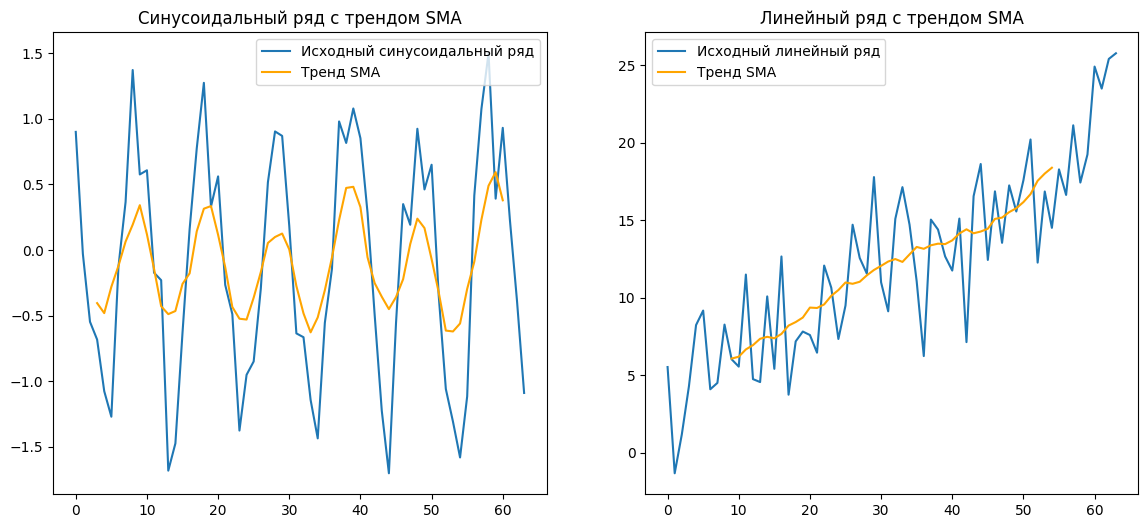

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

def simple_moving_average(data, window):
    return data.rolling(window=window, center=True).mean()

def optimize_sma(data, m_values):
    best_window = None
    best_q_stat = float('inf')

    for m in m_values:
        window = 2 * m + 1
        trend = simple_moving_average(data, window)
        residuals = data - trend

        q_stat = acorr_ljungbox(residuals.dropna(), lags=5, return_df=True)['lb_stat'].sum()

        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_window = window

    return best_window, best_q_stat

def interpret_dw_stat(dw_stat, dL, dU):
    if dw_stat < dL:
        return "Положительная автокорреляция"
    elif dw_stat >= dL and dw_stat < dU:
        return "Неопределённость"
    else:
        return "Отсутствие автокорреляции"

# Параметры dL и dU
dL = 1.567
dU = 1.629

best_window1, q_stat1 = optimize_sma(df1['Value'], [3, 5, 7, 9])
print("Лучшее окно для SMA (синусоидальный ряд):", best_window1, "Q-статистика:", q_stat1)

best_window2, q_stat2 = optimize_sma(df2['Value'], [3, 5, 7, 9])
print("Лучшее окно для SMA (линейный ряд):", best_window2, "Q-статистика:", q_stat2)

trend_sma1 = simple_moving_average(df1['Value'], best_window1)
residuals_sma1 = df1['Value'] - trend_sma1

trend_sma2 = simple_moving_average(df2['Value'], best_window2)
residuals_sma2 = df2['Value'] - trend_sma2

residuals_sma1 = residuals_sma1.dropna()
residuals_sma2 = residuals_sma2.dropna()

dw_stat1 = durbin_watson(residuals_sma1)
print("Дарбин-Уотсон (синусоидальный ряд, SMA):", dw_stat1)
print("Интерпретация для синусоидального ряда:", interpret_dw_stat(dw_stat1, dL, dU))

dw_stat2 = durbin_watson(residuals_sma2)
print("Дарбин-Уотсон (линейный ряд, SMA):", dw_stat2)
print("Интерпретация для линейного ряда:", interpret_dw_stat(dw_stat2, dL, dU))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df1['Value'], label='Исходный синусоидальный ряд')
plt.plot(trend_sma1, label='Тренд SMA', color='orange')
plt.legend()
plt.title("Синусоидальный ряд с трендом SMA")

plt.subplot(1, 2, 2)
plt.plot(df2['Value'], label='Исходный линейный ряд')
plt.plot(trend_sma2, label='Тренд SMA', color='orange')
plt.legend()
plt.title("Линейный ряд с трендом SMA")

plt.show()

In [ ]:
print(residuals_sma1.head())  # для синусоидального ряда
print(residuals_sma2.head())  # для линейного ряда

3   -0.277607
4   -0.594596
5   -0.988874
6   -0.006488
7    0.301850
Name: Value, dtype: float64
9    -0.046992
10   -0.639050
11    4.827245
12   -2.191374
13   -2.790671
Name: Value, dtype: float64


Лучшее окно для WMA (синусоидальный ряд): 19 Q-статистика: 214.81742327282697
Лучшее окно для WMA (линейный ряд): 19 Q-статистика: 4.156223571454961
Дарбин-Уотсон (синусоидальный ряд, WMA): 0.5640119637282068
Интерпретация для синусоидального ряда: Положительная автокорреляция
Дарбин-Уотсон (линейный ряд, WMA): 1.6921983147590562
Интерпретация для линейного ряда: Отсутствие автокорреляции


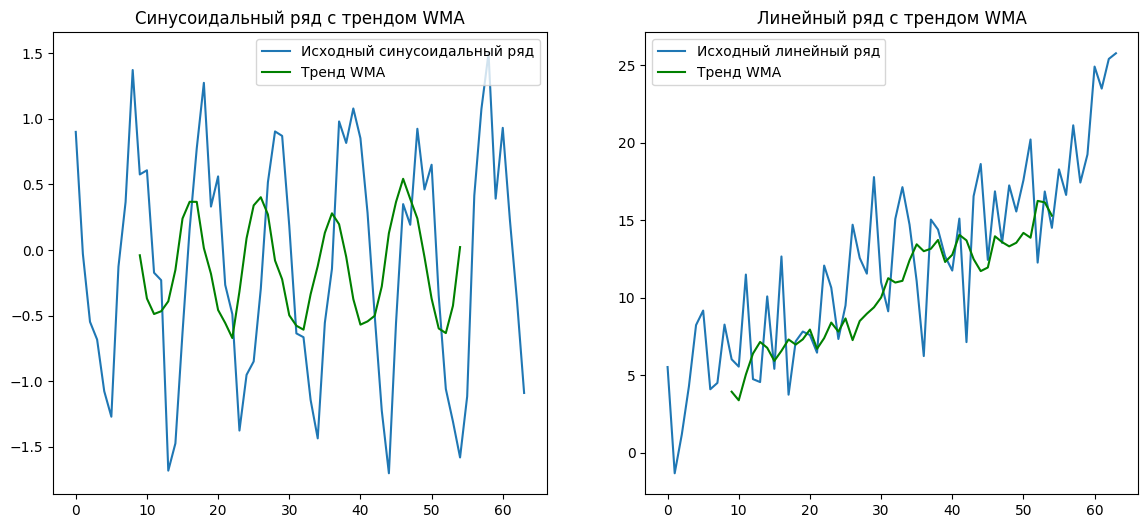

In [ ]:
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import pandas as pd

def weighted_moving_average(data, window, epsilon=0.3):
    weights = np.exp(-epsilon * np.arange(window))
    weights /= weights.sum()
    return data.rolling(window=window, center=True).apply(lambda x: np.dot(x, weights), raw=True)

def optimize_wma(data, m_values):
    best_window = None
    best_q_stat = float('inf')

    for m in m_values:
        window = 2 * m + 1
        trend = weighted_moving_average(data, window)
        residuals = data - trend

        q_stat = acorr_ljungbox(residuals.dropna(), lags=5, return_df=True)['lb_stat'].sum()

        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_window = window

    return best_window, best_q_stat

def interpret_dw_stat(dw_stat, dL, dU):
    if dw_stat < dL:
        return "Положительная автокорреляция"
    elif dw_stat >= dL and dw_stat < dU:
        return "Неопределённость"
    else:
        return "Отсутствие автокорреляции"

# Параметры dL и dU
dL = 1.567
dU = 1.629

best_window1, q_stat1 = optimize_wma(df1['Value'], [3, 5, 7, 9])
print("Лучшее окно для WMA (синусоидальный ряд):", best_window1, "Q-статистика:", q_stat1)

best_window2, q_stat2 = optimize_wma(df2['Value'], [3, 5, 7, 9])
print("Лучшее окно для WMA (линейный ряд):", best_window2, "Q-статистика:", q_stat2)

trend_wma1 = weighted_moving_average(df1['Value'], best_window1)
residuals_wma1 = df1['Value'] - trend_wma1

trend_wma2 = weighted_moving_average(df2['Value'], best_window2)
residuals_wma2 = df2['Value'] - trend_wma2

residuals_wma1 = residuals_wma1.dropna()
residuals_wma2 = residuals_wma2.dropna()

dw_stat1 = durbin_watson(residuals_wma1)
print("Дарбин-Уотсон (синусоидальный ряд, WMA):", dw_stat1)
print("Интерпретация для синусоидального ряда:", interpret_dw_stat(dw_stat1, dL, dU))

dw_stat2 = durbin_watson(residuals_wma2)
print("Дарбин-Уотсон (линейный ряд, WMA):", dw_stat2)
print("Интерпретация для линейного ряда:", interpret_dw_stat(dw_stat2, dL, dU))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df1['Value'], label='Исходный синусоидальный ряд')
plt.plot(trend_wma1, label='Тренд WMA', color='green')
plt.legend()
plt.title("Синусоидальный ряд с трендом WMA")

plt.subplot(1, 2, 2)
plt.plot(df2['Value'], label='Исходный линейный ряд')
plt.plot(trend_wma2, label='Тренд WMA', color='green')
plt.legend()
plt.title("Линейный ряд с трендом WMA")

plt.show()


Лучший span для EMA (синусоидальный ряд): 3 Q-статистика: 235.83836075130864
Лучший span для EMA (линейный ряд): 9 Q-статистика: 3.680189644998724
Дарбин-Уотсон (синусоидальный ряд, EMA): 0.7710037627247934
Интерпретация для синусоидального ряда: Положительная автокорреляция
Дарбин-Уотсон (линейный ряд, EMA): 1.7786106405442266
Интерпретация для линейного ряда: Отсутствие автокорреляции


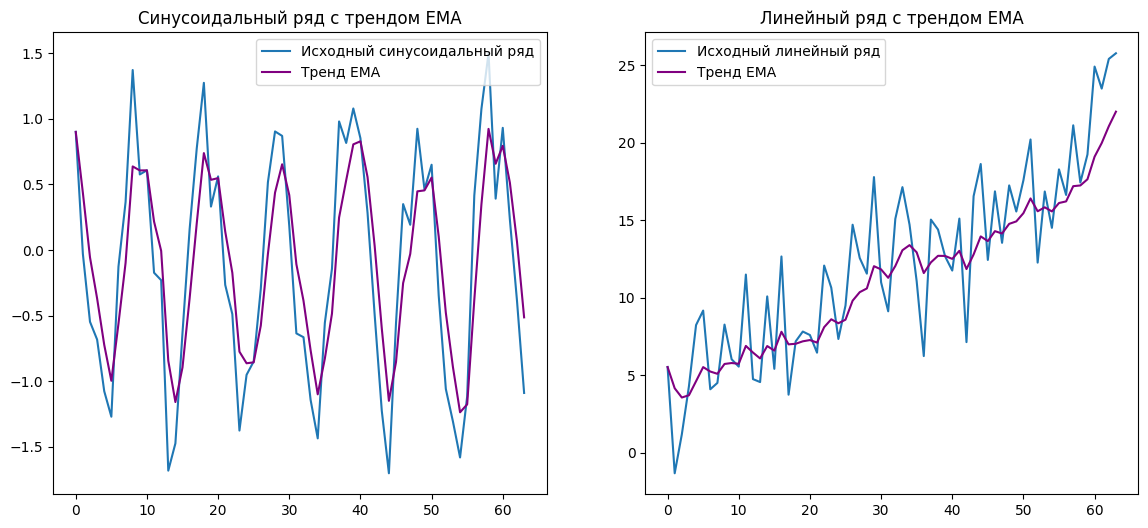

In [ ]:
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import pandas as pd

def exponential_moving_average(data, span):
    return data.ewm(span=span, adjust=False).mean()

def optimize_ema(data, span_values):
    best_span = None
    best_q_stat = float('inf')

    for span in span_values:
        trend = exponential_moving_average(data, span)
        residuals = data - trend
        q_stat = acorr_ljungbox(residuals.dropna(), lags=5, return_df=True)['lb_stat'].sum()

        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_span = span

    return best_span, best_q_stat

def interpret_dw_stat(dw_stat, dL, dU):
    if dw_stat < dL:
        return "Положительная автокорреляция"
    elif dw_stat >= dL and dw_stat < dU:
        return "Неопределённость"
    else:
        return "Отсутствие автокорреляции"

# Параметры dL и dU
dL = 1.567
dU = 1.629

best_span1, q_stat1 = optimize_ema(df1['Value'], [3, 5, 7, 9])
print("Лучший span для EMA (синусоидальный ряд):", best_span1, "Q-статистика:", q_stat1)

best_span2, q_stat2 = optimize_ema(df2['Value'], [3, 5, 7, 9])
print("Лучший span для EMA (линейный ряд):", best_span2, "Q-статистика:", q_stat2)

trend_ema1 = exponential_moving_average(df1['Value'], best_span1)
residuals_ema1 = df1['Value'] - trend_ema1
trend_ema2 = exponential_moving_average(df2['Value'], best_span2)
residuals_ema2 = df2['Value'] - trend_ema2

dw_stat1 = durbin_watson(residuals_ema1.dropna())
dw_stat2 = durbin_watson(residuals_ema2.dropna())

print("Дарбин-Уотсон (синусоидальный ряд, EMA):", dw_stat1)
print("Интерпретация для синусоидального ряда:", interpret_dw_stat(dw_stat1, dL, dU))

print("Дарбин-Уотсон (линейный ряд, EMA):", dw_stat2)
print("Интерпретация для линейного ряда:", interpret_dw_stat(dw_stat2, dL, dU))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df1['Value'], label='Исходный синусоидальный ряд')
plt.plot(trend_ema1, label='Тренд EMA', color='purple')
plt.legend()
plt.title("Синусоидальный ряд с трендом EMA")

plt.subplot(1, 2, 2)
plt.plot(df2['Value'], label='Исходный линейный ряд')
plt.plot(trend_ema2, label='Тренд EMA', color='purple')
plt.legend()
plt.title("Линейный ряд с трендом EMA")
plt.show()

Лучший span для DEMA (синусоидальный ряд): 3 Q-статистика: 154.72300747434429
Лучший span для DEMA (линейный ряд): 9 Q-статистика: 17.85029897001302
Дарбин-Уотсон (синусоидальный ряд, DEMA): 1.0818003575932809
Дарбин-Уотсон (линейный ряд, DEMA): 2.290072625002803
Оценка для синусоидального ряда (DEMA): Положительная автокорреляция
Оценка для линейного ряда (DEMA): Автокорреляция отсутствует


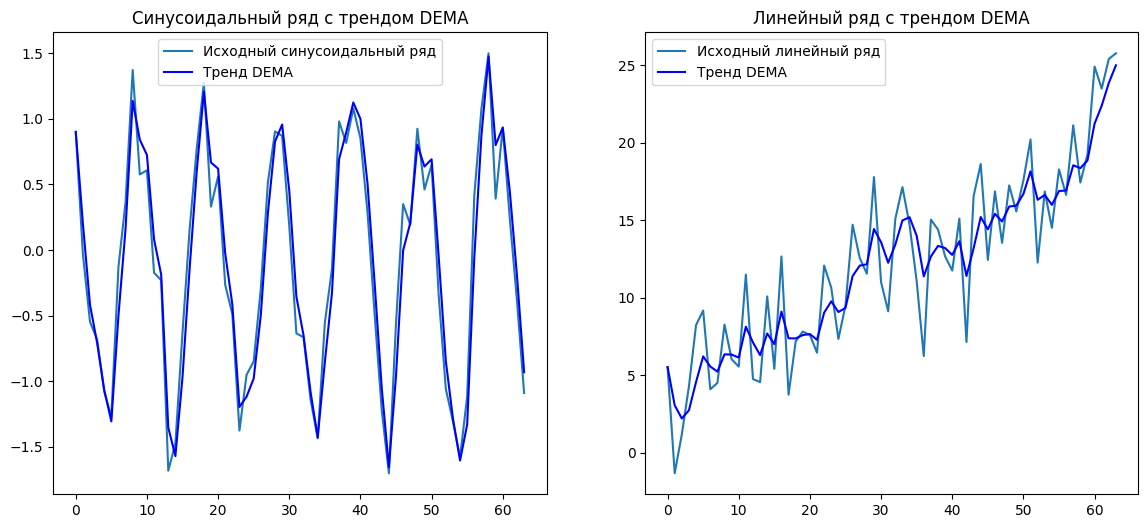

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Параметры dL и dU
d_L = 1.567
d_U = 1.629

def double_exponential_moving_average(data, span):
    ema1 = data.ewm(span=span, adjust=False).mean()
    ema2 = ema1.ewm(span=span, adjust=False).mean()
    return 2 * ema1 - ema2

def optimize_dema(data, span_values):
    best_span = None
    best_q_stat = float('inf')

    for span in span_values:
        trend = double_exponential_moving_average(data, span)
        residuals = data - trend
        q_stat = acorr_ljungbox(residuals.dropna(), lags=5, return_df=True)['lb_stat'].sum()

        if q_stat < best_q_stat:
            best_q_stat = q_stat
            best_span = span

    return best_span, best_q_stat

best_span1, q_stat1 = optimize_dema(df1['Value'], [3, 5, 7, 9])
print("Лучший span для DEMA (синусоидальный ряд):", best_span1, "Q-статистика:", q_stat1)

best_span2, q_stat2 = optimize_dema(df2['Value'], [3, 5, 7, 9])
print("Лучший span для DEMA (линейный ряд):", best_span2, "Q-статистика:", q_stat2)

trend_dema1 = double_exponential_moving_average(df1['Value'], best_span1)
residuals_dema1 = df1['Value'] - trend_dema1
trend_dema2 = double_exponential_moving_average(df2['Value'], best_span2)
residuals_dema2 = df2['Value'] - trend_dema2

dw_stat1 = durbin_watson(residuals_dema1.dropna())
dw_stat2 = durbin_watson(residuals_dema2.dropna())
print("Дарбин-Уотсон (синусоидальный ряд, DEMA):", dw_stat1)
print("Дарбин-Уотсон (линейный ряд, DEMA):", dw_stat2)

def dw_evaluation(dw_stat):
    if dw_stat < d_L:
        return "Положительная автокорреляция"
    elif d_L <= dw_stat < d_U:
        return "Неопределённость"
    else:
        return "Автокорреляция отсутствует"

evaluation1 = dw_evaluation(dw_stat1)
evaluation2 = dw_evaluation(dw_stat2)

print("Оценка для синусоидального ряда (DEMA):", evaluation1)
print("Оценка для линейного ряда (DEMA):", evaluation2)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df1['Value'], label='Исходный синусоидальный ряд')
plt.plot(trend_dema1, label='Тренд DEMA', color='blue')
plt.legend()
plt.title("Синусоидальный ряд с трендом DEMA")

plt.subplot(1, 2, 2)
plt.plot(df2['Value'], label='Исходный линейный ряд')
plt.plot(trend_dema2, label='Тренд DEMA', color='blue')
plt.legend()
plt.title("Линейный ряд с трендом DEMA")
plt.show()
